# Eigenvalue Decomposition Analysis of MNIST Digits

This notebook demonstrates eigenvalue decomposition on MNIST digit images, showing how the first 8 eigenvectors capture the essential features of a digit.

In [ ]:
import sys

import numpy as np
import matplotlib.pyplot as plt

# Add the project root to Python path for imports
sys.path.append('..')
from mnist_numpy.data import load_data, DEFAULT_DATA_PATH

In [ ]:
# Load the MNIST dataset
X, Y = load_data(DEFAULT_DATA_PATH)
print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {Y.shape}")
print(f"First digit label: {np.argmax(Y[0]Y, X

Dataset shape: (59999, 784)
Labels shape: (59999, 10)
First digit label: 0


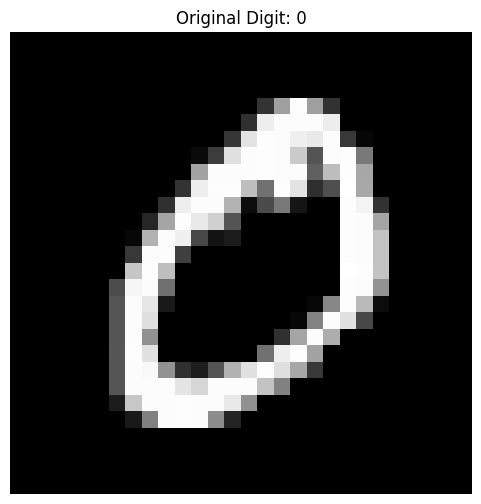

In [7]:
# Extract and reshape the first digit for visualisation
first_digit = X[0].reshape(28, 28)

# Display the original digit
plt.figure(figsize=(6, 6))
plt.imshow(first_digit, cmap='gray')
plt.title(f'Original Digit: {np.argmax(Y[0])}')
plt.axis('off')
plt.show()

In [8]:
# Perform eigenvalue decomposition (SVD for numerical stability)
# SVD: A = U * S * V^T, where U contains left eigenvectors
U, s, Vt = np.linalg.svd(first_digit, full_matrices=False)

print(f"Original image shape: {first_digit.shape}")
print(f"U shape (left eigenvectors): {U.shape}")
print(f"Singular values shape: {s.shape}")
print(f"V^T shape (right eigenvectors): {Vt.shape}")
print(f"First 8 singular values: {s[:8]}")

Original image shape: (28, 28)
U shape (left eigenvectors): (28, 28)
Singular values shape: (28,)
V^T shape (right eigenvectors): (28, 28)
First 8 singular values: [7.16097931 4.56151398 3.54160853 3.08474029 1.83511568 1.68354571
 1.39533517 0.77554229]


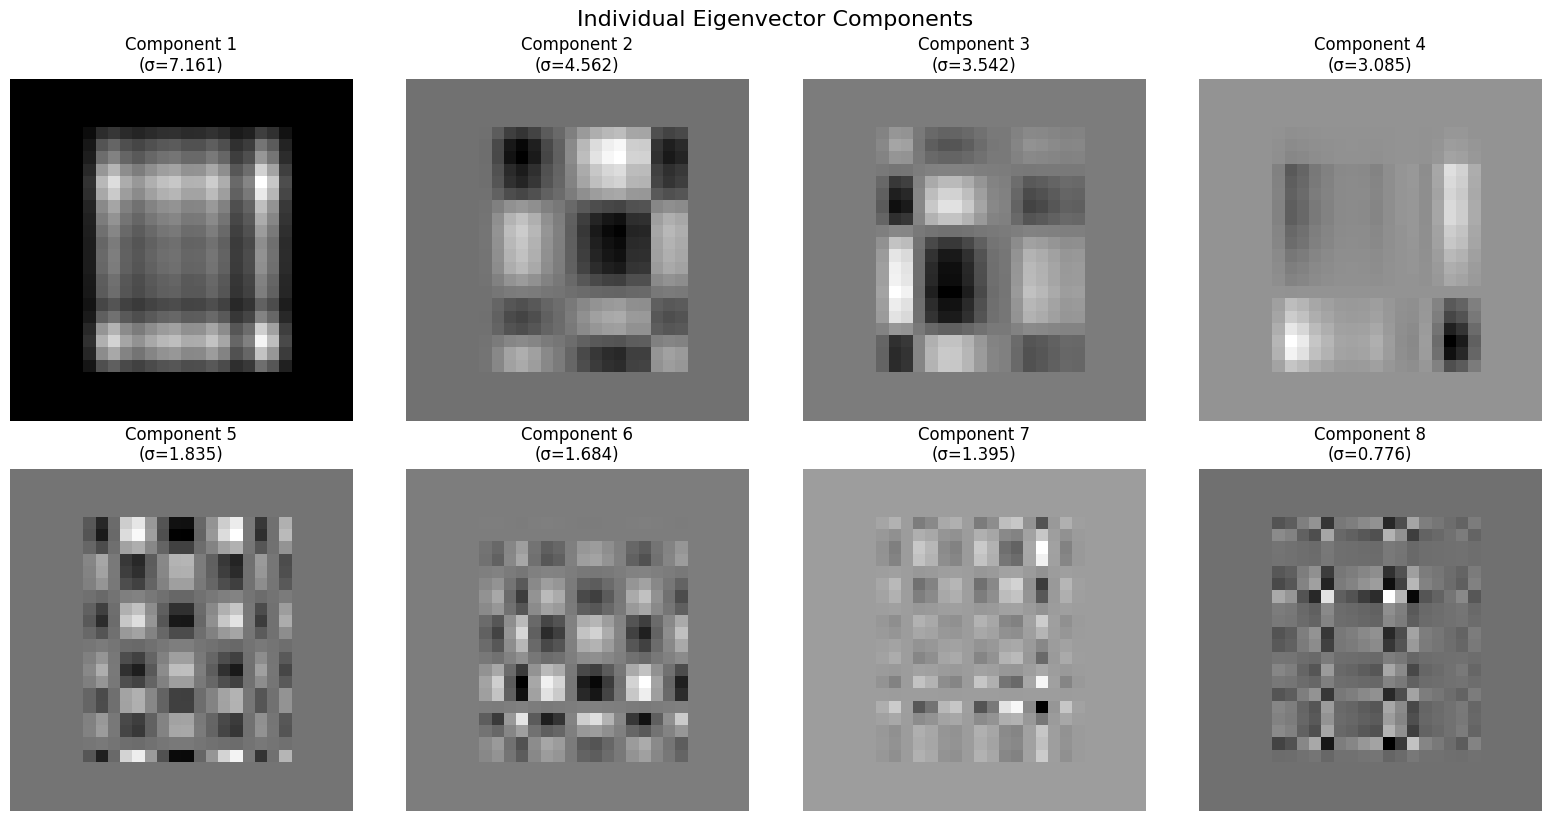

In [9]:
# Display the first 8 eigenvector components
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i in range(8):
    # Reconstruct using only the i-th component
    component = s[i] * np.outer(U[:, i], Vt[i, :])
    
    axes[i].imshow(component, cmap='gray')
    axes[i].set_title(f'Component {i+1}\n(σ={s[i]:.3f})')
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Individual Eigenvector Components', y=1.02, fontsize=16)
plt.show()